# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


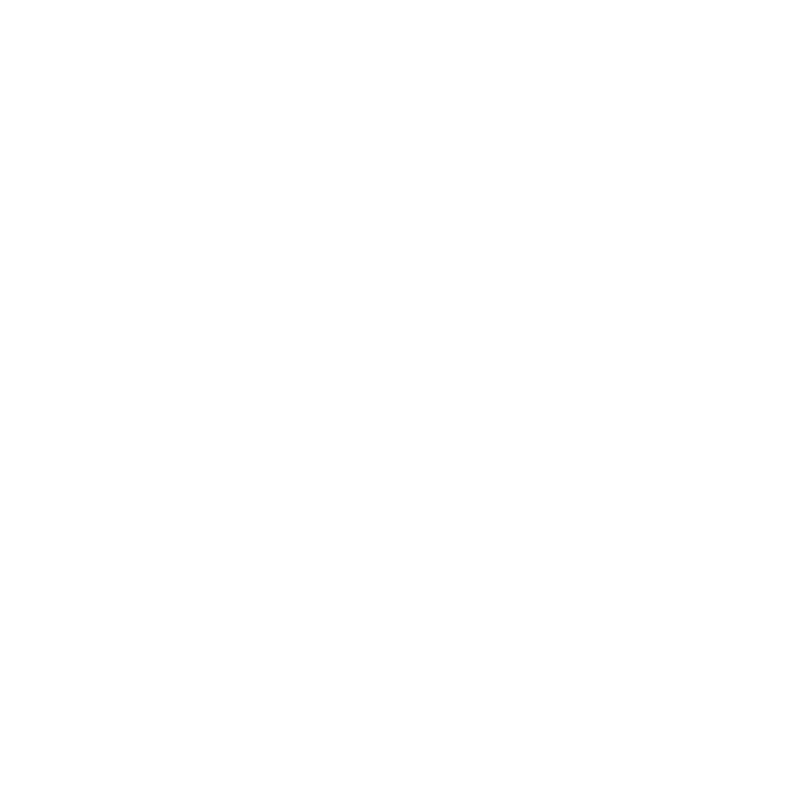

In [87]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
%matplotlib notebook
import mplleaflet
import pandas as pd
from datetime import datetime

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [61]:
# Read CSV and convert to dataframe
filepath = r'data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'
df = pd.read_csv(filepath)

# Convert the Date column to a datetime format
df['Data_Value'] *= 0.1
df.index = pd.to_datetime(df.Date)
df.Date = pd.to_datetime(df.Date)

df = df.sort_index()
print(df.shape)
df.head()

(165085, 4)


,ID,Date,Element,Data_Value
Date,,,,
2005-01-01,USW00004848,2005-01-01,TMIN,0.0
2005-01-01,USC00207320,2005-01-01,TMAX,15.0
2005-01-01,USC00207320,2005-01-01,TMIN,-1.1
2005-01-01,USW00014833,2005-01-01,TMIN,-4.4
2005-01-01,USW00014833,2005-01-01,TMAX,3.3


In [62]:
df.tail()

,ID,Date,Element,Data_Value
Date,,,,
2015-12-31,USC00200032,2015-12-31,TMAX,1.1
2015-12-31,USC00205050,2015-12-31,TMIN,-1.7
2015-12-31,USC00208202,2015-12-31,TMAX,0.0
2015-12-31,USC00201250,2015-12-31,TMIN,-0.6
2015-12-31,USC00200230,2015-12-31,TMIN,-1.7


In [63]:
# Remove leap day FEB 29
df = df[~((df.index.month == 2) & (df.index.day == 29))]
df.shape

(165002, 4)

In [64]:
len(df.ID.unique())

24

In [65]:
# Divide datasets

# TMAX 2005 - 2014
df_max_05_14 = df[(~(df.index.year == 2015) & (df.Element == 'TMAX'))]
print(df_max_05_14.head(2), df_max_05_14.tail(2))
print(df_max_05_14.shape)

# TMAX 2015
df_max_15 = df[((df.index.year == 2015) & (df.Element == 'TMAX'))]
print(df_max_15.head(2),df_max_15.tail(2))
print(df_max_15.shape)

# TMIN 2005 - 2014
df_min_05_14 = df[(~(df.index.year == 2015) & (df.Element == 'TMIN'))]
print(df_min_05_14.head(2), df_min_05_14.tail(2))
print(df_min_05_14.shape)

# TMIN 2015
df_min_15 = df[((df.index.year == 2015) & (df.Element == 'TMIN'))]
print(df_min_15.head(2), df_min_15.tail(2))
print(df_min_15.shape)

                     ID       Date Element  Data_Value
Date                                                  
2005-01-01  USC00207320 2005-01-01    TMAX        15.0
2005-01-01  USW00014833 2005-01-01    TMAX         3.3                      ID       Date Element  Data_Value
Date                                                  
2014-12-31  USC00205563 2014-12-31    TMAX        -2.8
2014-12-31  USC00205822 2014-12-31    TMAX        -2.8
(76100, 4)
                     ID       Date Element  Data_Value
Date                                                  
2015-01-01  USC00208972 2015-01-01    TMAX        -6.7
2015-01-01  USC00200228 2015-01-01    TMAX        -5.0                      ID       Date Element  Data_Value
Date                                                  
2015-12-31  USC00200032 2015-12-31    TMAX         1.1
2015-12-31  USC00208202 2015-12-31    TMAX         0.0
(6920, 4)
                     ID       Date Element  Data_Value
Date                                        

In [66]:
# Group datasets by day and get the MAX/MIN value
# MAX 2005 - 2014
df_max_05_14_day = df_max_05_14.groupby([df_max_05_14.index.month, df_max_05_14.index.day]).max()
print(df_max_05_14_day.head(),'\n',df_max_05_14_day.shape)

#MIN 2005 - 2014
df_min_05_14_day = df_min_05_14.groupby([df_min_05_14.index.month, df_min_05_14.index.day]).min()
print(df_min_05_14_day.head(),'\n',df_min_05_14_day.shape)

#MAX 2015
df_max_15_day = df_max_15.groupby([df_max_15.index.month, df_max_15.index.day]).max()
print(df_max_15_day.head(),'\n',df_max_15_day.shape)

#MIN 2015
df_min_15_day = df_min_15.groupby([df_min_15.index.month, df_min_15.index.day]).min()
print(df_min_15_day.head(),'\n',df_min_15_day.shape)

              ID       Date Element  Data_Value
1 1  USW00094889 2014-01-01    TMAX        15.6
  2  USW00094889 2014-01-02    TMAX        13.9
  3  USW00094889 2014-01-03    TMAX        13.3
  4  USW00094889 2014-01-04    TMAX        10.6
  5  USW00094889 2014-01-05    TMAX        12.8 
 (365, 4)
              ID       Date Element  Data_Value
1 1  USC00200032 2005-01-01    TMIN       -16.0
  2  USC00200032 2005-01-02    TMIN       -26.7
  3  USC00200032 2005-01-03    TMIN       -26.7
  4  USC00200032 2005-01-04    TMIN       -26.1
  5  USC00200032 2005-01-05    TMIN       -15.0 
 (365, 4)
              ID       Date Element  Data_Value
1 1  USW00094889 2015-01-01    TMAX         1.1
  2  USW00094889 2015-01-02    TMAX         3.9
  3  USW00014853 2015-01-03    TMAX         3.9
  4  USW00094889 2015-01-04    TMAX         4.4
  5  USW00094889 2015-01-05    TMAX         2.8 
 (365, 4)
              ID       Date Element  Data_Value
1 1  USC00200032 2015-01-01    TMIN       -13.3
  2  US

In [67]:
# Filtering outliers
df_outliers_max = df_max_15_day[df_max_15_day.Data_Value > df_max_05_14_day.Data_Value]
df_outliers_min = df_min_15_day[df_min_15_day.Data_Value < df_min_05_14_day.Data_Value]

In [68]:
# Setup a date range (for an arbitrary year)
drange = pd.date_range('2015-01-01', periods=365, freq='D')
drange

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

<IPython.core.display.Javascript object>


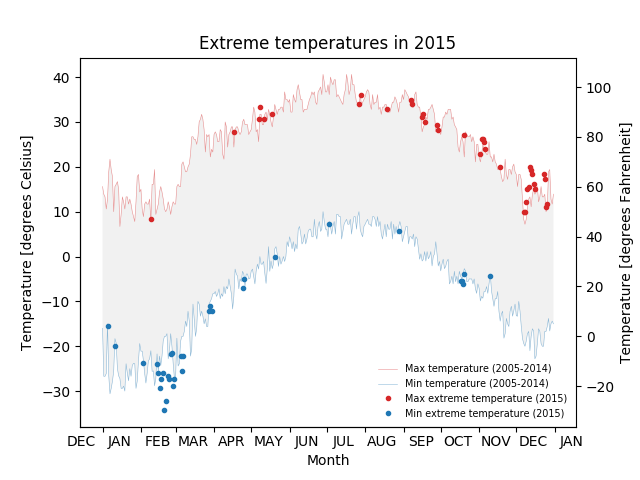

(-36.481000000000009, 111.821)

In [105]:
# create a new figure
plt.figure()

# plot the point (3,2) using the circle marker
plt.plot(drange, df_max_05_14_day['Data_Value'], label='Max temperature (2005-2014)', lw=0.4, color='tab:red', alpha=0.5)
plt.plot(drange, df_min_05_14_day['Data_Value'], label='Min temperature (2005-2014)', lw=0.4, color='tab:blue', alpha=0.5)

# Format the axes
ax = plt.gca()

labels = ax.get_xticklabels()
# remove the first and the last labels
labels[0] = labels[-1] = ""

# Set tick locators
ax.xaxis.set_major_locator(mdates.MonthLocator()) #Monthly
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15)) #Each 15th day

#Set tick label format
ax.xaxis.set_major_formatter(ticker.NullFormatter()) #None
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%^b')) #Month MMM


#Format minor ticks
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

# Plot the 2015 outliers
plt.plot(df_outliers_max.Date, df_outliers_max.Data_Value, 'o', ms=3, label='Max extreme temperature (2015)', color='tab:red')
plt.plot(df_outliers_min.Date, df_outliers_min.Data_Value, 'o', ms=3, label='Min extreme temperature (2015)', color='tab:blue')

# Fill the area between lines
plt.gca().fill_between(drange, 
                       df_max_05_14_day['Data_Value'],
                       df_min_05_14_day['Data_Value'], 
                       facecolor='tab:gray', 
                       alpha=0.1)

# Legend and axes formatting
plt.legend(loc=4,frameon=False, fontsize='x-small')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Month')
ax.set_ylabel('Temperature [degrees Celsius]')
ax.set_title('Extreme temperatures in 2015')

# Set the second axis
ax2 = ax.twinx()
ax2.set_ylabel("Temperature [degrees Fahrenheit]")
# Set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))